In [218]:
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline

In [219]:
# 1. Significant earthquakes since 2150 B.C. 
# Read the file renamed"Sig_Eqs.tsv"
Sig_Eqs=pd.read_csv("earthquakes-2022-10-18_09-17-48_+0800.tsv.tsv","\t")

D:\Users\60918\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [220]:
# 1.1 
# Compute the total number of deaths since 2150 B.C.groupby "country"
Total_deaths=Sig_Eqs.groupby(["Country"])["Deaths"].sum()
print("Total_deaths of each country since 2150 B.C.:")
print(Total_deaths)
# Use sort_values() function to list top 20 countries with the highest total number of deaths
Total_deaths_top20=Total_deaths.sort_values(ascending=False).head(20)
print("\nTop 20 countries with highest total deaths:"),
print(Total_deaths_top20)

Total_deaths of each country since 2150 B.C.:
Country
AFGHANISTAN                             14254.0
ALBANIA                                  3132.0
ALGERIA                                 39339.0
ANTARCTICA                                  0.0
ANTIGUA AND BARBUDA                         0.0
                                         ...   
VENEZUELA                               44480.0
VIETNAM                                     0.0
WALLIS AND FUTUNA (FRENCH TERRITORY)        5.0
YEMEN                                    4192.0
ZAMBIA                                      0.0
Name: Deaths, Length: 156, dtype: float64

Top 20 countries with highest total deaths:
Country
CHINA           2075019.0
TURKEY          1134569.0
IRAN            1011446.0
ITALY            498477.0
SYRIA            439224.0
HAITI            323474.0
AZERBAIJAN       317219.0
JAPAN            278142.0
ARMENIA          191890.0
PAKISTAN         145083.0
IRAQ             136200.0
ECUADOR          135479.0
TURKMENISTA

Year
-2150.0    0
-2000.0    1
-1610.0    0
-1566.0    0
-1450.0    0
          ..
 2018.0    0
 2019.0    1
 2020.0    0
 2021.0    0
 2022.0    0
Name: Ms_3, Length: 954, dtype: int64


C:\Users\60918\AppData\Local\Temp\ipykernel_15936\2910569303.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Ms_3"][df["Ms"]< 3.0]= 0
C:\Users\60918\AppData\Local\Temp\ipykernel_15936\2910569303.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Ms_3"][df["Ms"]> 3.0]=1


Text(0, 0.5, 'Total number of earthquakes with Ms larger than 3.0')

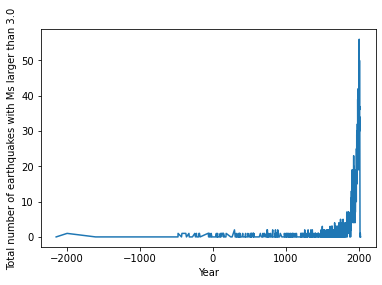

In [221]:
# 1.2
# Add a new column"Ms_3" to detect whether the "Ms" is larger than 3, and refill the column with 0 or 1.
# Then sum(Ms_3) groupby "Year" means the total number of Earthquakes with Ms>3.
df["Ms_3"]=0
df["Ms_3"][df["Ms"]< 3.0]= 0
df["Ms_3"][df["Ms"]> 3.0]=1
Year_Ms_3=df.groupby("Year")["Ms_3"].sum()
print(Year_Ms_3)
# Using the method above, those year with no Earthquake(whose Ms>3) won't be ignored when plotting.
Year_Ms_3.plot()
plt.xlabel("Year")
plt.ylabel("Total number of earthquakes with Ms larger than 3.0")
# The total number of Earthquakes with Ms>3 seemed to increased after 1000 A.D.,and appeared a sharp uprise around 2000 A.D.,
# which may result from an active period of crustal movement in recent years.

In [222]:
# 1.3
# Add some new columns to standardize "Date"
Sig_Eqs["cYear"]=Sig_Eqs['Year'].astype(str).str.split(".",expand=True)[0]
# Use function str.split() to remove the decimal point.
Sig_Eqs["cMo"]= Sig_Eqs["Mo"].astype(str).str.split(".",expand=True)[0]
Sig_Eqs["cMo"][Sig_Eqs["Mo"]<10] = "0" + Sig_Eqs["cMo"]
Sig_Eqs["cDy"]= Sig_Eqs["Dy"].astype(str).str.split(".",expand=True)[0]
Sig_Eqs["cDy"][Sig_Eqs["Dy"]<10] = "0"+ Sig_Eqs["cDy"]
Sig_Eqs["Date"] = Sig_Eqs["cYear"] + "/" + Sig_Eqs["cMo"] + "/" + Sig_Eqs["cDy"]
Sig_Eqs

C:\Users\60918\AppData\Local\Temp\ipykernel_15936\2670310763.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sig_Eqs["cMo"][Sig_Eqs["Mo"]<10] = "0" + Sig_Eqs["cMo"]
C:\Users\60918\AppData\Local\Temp\ipykernel_15936\2670310763.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sig_Eqs["cDy"][Sig_Eqs["Dy"]<10] = "0"+ Sig_Eqs["cDy"]


,Search Parameters,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,Country,...,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description,cYear,cMo,cDy,Date
0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,nan,nan/nan/nan
1,NaN,-2150.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,JORDAN,...,NaN,NaN,NaN,NaN,NaN,NaN,-2150,nan,nan,-2150/nan/nan
2,NaN,-2000.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,SYRIA,...,NaN,NaN,NaN,NaN,NaN,NaN,-2000,nan,nan,-2000/nan/nan
3,NaN,-2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TURKMENISTAN,...,NaN,1.0,NaN,1.0,NaN,NaN,-2000,nan,nan,-2000/nan/nan
4,NaN,-1610.0,NaN,NaN,NaN,NaN,NaN,3.0,1351.0,GREECE,...,NaN,3.0,NaN,NaN,NaN,NaN,-1610,nan,nan,-1610/nan/nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6333,NaN,2022.0,9.0,19.0,18.0,5.0,6.0,5859.0,NaN,MEXICO,...,NaN,4.0,800.0,NaN,6084.0,4.0,2022,09,19,2022/09/19
6334,NaN,2022.0,9.0,22.0,6.0,16.0,9.0,5861.0,NaN,MEXICO,...,NaN,2.0,NaN,NaN,NaN,NaN,2022,09,22,2022/09/22
6335,NaN,2022.0,9.0,30.0,19.0,28.0,40.0,NaN,NaN,INDONESIA,...,NaN,2.0,NaN,NaN,NaN,NaN,2022,09,30,2022/09/30
6336,NaN,2022.0,10.0,5.0,0.0,21.0,29.0,NaN,NaN,IRAN,...,NaN,3.0,NaN,2.0,NaN,3.0,2022,10,05,2022/10/05


In [223]:
# 1.3 Connected above
# Ask users to input a country to test the function CountEq_LargestEq() defined below.
Coun=(input("Please input a country to get its more detailed information of earthquakes:")).upper()
# Define a function "CountEq_LargestEq()".
def CountEq_LargestEq(x):
    # Count the total number of earthquakes for each country
    Country_earthquakes_count = Sig_Eqs["Country"][Sig_Eqs["Country"]==x].count()
    # Find the largest earthquake_Ms for each country
    Country_earthquakes_Ms_max =  Sig_Eqs["Ms"][Sig_Eqs["Country"]==x].max()
    # Based on the largest earthquake_Ms, locate the corresponding earthquake.
    Ms_max=Sig_Eqs.loc[(Sig_Eqs["Country"]==x)&(Sig_Eqs["Ms"]==Country_earthquakes_Ms_max)]
    # Get information of date and location of the largest earthquake
    DATE=Ms_max["Date"].astype(str)
    LOCATION=Ms_max["Location Name"].astype(str)
    LATITUDE=Ms_max["Latitude"].astype(str)
    LONGTITUDE=Ms_max["Longitude"].astype(str)
    return x,Country_earthquakes_count,Country_earthquakes_Ms_max,DATE,LOCATION,LATITUDE,LONGTITUDE
CountEq_LargestEq(Coun)  

Please input a country to get its more detailed information of earthquakes:china


('CHINA',
 616,
 8.6,
 2944    1920/12/16
 Name: Date, dtype: object,
 2944    CHINA:  GANSU PROVINCE, SHANXI PROVINCE
 Name: Location Name, dtype: object,
 2944    36.601
 Name: Latitude, dtype: object,
 2944    105.317
 Name: Longitude, dtype: object)

In [224]:
# 1.3 Connected above
# Make a new list to contain all the country with vaild earthquake information
country_list=[]
for (i),group in Sig_Eqs[Sig_Eqs["Ms"]>0].groupby("Country"):
    country_list.append(i)
# Make a new dataframe to contain information of date and location of the largest earthquake groupby "Country".    
df_new=pd.DataFrame(columns=["Country","Earthquakes_Number","Ms","Date","Location","Latitude","Longtitude"])
# Combine a "for" loop to apply the function "CountEq_LargestEq()" for each country and generate rows country by country
x=0
for i in country_list:
    df_new.loc[x]=[i,CountEq_LargestEq(i)[1],CountEq_LargestEq(i)[2],CountEq_LargestEq(i)[3],CountEq_LargestEq(i)[4],CountEq_LargestEq(i)[5],CountEq_LargestEq(i)[6]]
    x+=1
# Sort the country based on "Earthquakes_Number" and "Ms" in a descending order.
df_new=df_new.sort_values(["Earthquakes_Number","Ms"],ascending=False)
# Make a new index for "df_new".
df_new.reset_index(drop=True, inplace=True)
df_new

,Country,Earthquakes_Number,Ms,Date,Location,Latitude,Longtitude
0,CHINA,616,8.6,"2944 1920/12/16 Name: Date, dtype: object","2944 CHINA: GANSU PROVINCE, SHANXI PROVINC...","2944 36.601 Name: Latitude, dtype: object","2944 105.317 Name: Longitude, dtype: object"
1,JAPAN,411,8.6,"250 869/07/13 256 887/08/26 Name: Date, ...",250 JAPAN: SANRIKU 256 JAPAN: NANKAID...,"250 38.5 256 33.0 Name: Latitude, dtype:...","250 143.8 256 135.3 Name: Longitude, dty..."
2,INDONESIA,405,8.8,"5327 2004/12/26 Name: Date, dtype: object",5327 INDONESIA: SUMATRA: ACEH: OFF WEST ...,"5327 3.316 Name: Latitude, dtype: object","5327 95.854 Name: Longitude, dtype: object"
3,IRAN,384,7.9,"237 856/12/22 Name: Date, dtype: object","237 IRAN: DAMGHAN, QUMIS Name: Location Na...","237 36.2 Name: Latitude, dtype: object","237 54.3 Name: Longitude, dtype: object"
4,TURKEY,332,7.8,2853 1916/01/24 3400 1939/12/26 5034 ...,2853 TURKEY 34...,2853 41.0 3400 39.77 5034 40.76 Name...,2853 37.0 3400 39.533 5034 29.97 N...
...,...,...,...,...,...,...,...
124,GABON,1,6.2,"4246 1974/09/23 Name: Date, dtype: object","4246 GABON Name: Location Name, dtype: object","4246 -0.28 Name: Latitude, dtype: object","4246 12.92 Name: Longitude, dtype: object"
125,GUINEA,1,6.2,"4535 1983/12/22 Name: Date, dtype: object",4535 GUINEA: GAOUAL-KOUMBIA Name: Location...,"4535 11.866 Name: Latitude, dtype: object","4535 -13.529 Name: Longitude, dtype: object"
126,NORWAY,1,5.8,"1559 1819/08/31 Name: Date, dtype: object",1559 NORWAY: RANA REGION: LUROY Name: Locat...,"1559 66.416 Name: Latitude, dtype: object","1559 12.85 Name: Longitude, dtype: object"
127,LIBYA,1,5.4,"3912 1963/02/21 Name: Date, dtype: object",3912 LIBYA: BARCE (AL MARJ) Name: Location...,"3912 32.6 Name: Latitude, dtype: object","3912 21.0 Name: Longitude, dtype: object"
